## MACHINE LEARNING: BÀI THỰC HÀNH PHẦN MÔ HÌNH PERCEPTRON.

### Ví dụ 1.

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)

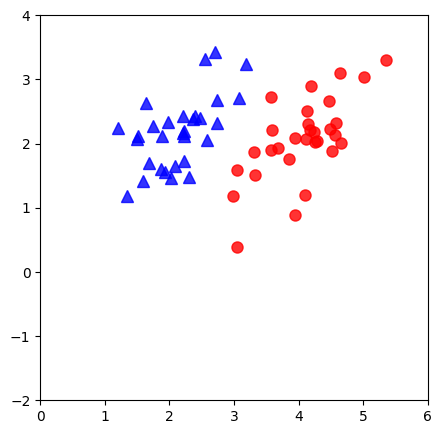

In [97]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([0, 6, -2, 4])
plt.show()

In [98]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [99]:
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)  #True if h(w, X) == y else False

In [100]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss

In [101]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi

                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break

    return (w, mis_points)


In [102]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(w[-1])

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]


In [103]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], 'k')
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], 'k')


MovieWriter imagemagick unavailable; using Pillow instead.


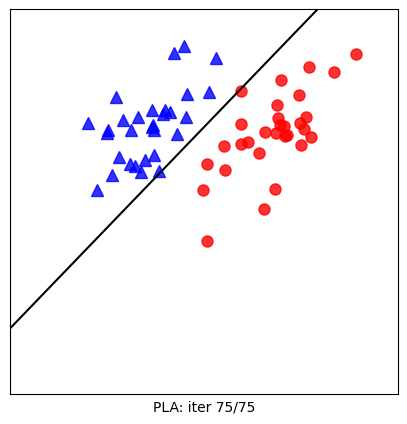

In [104]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it - 1
        ani = draw_line(w[i2])

        if i < it - 1:
    # draw one misclassified point


            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=
            False)
            ax.add_artist(circle)
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' % (i2, it - 1)
        ax.set_xlabel(label)
        return ani, ax
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('D:\\pla_vis.gif', dpi=100, writer='imagemagick')
    plt.show()
viz_alg_1d_2(w)

### Ví dụ 2.

In [105]:
import pandas as pd
import numpy as np
import time

In [106]:
main_df = pd.read_csv('D:\\Hoc may\\Bài thực hành 7\\sonar.all-data.csv',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

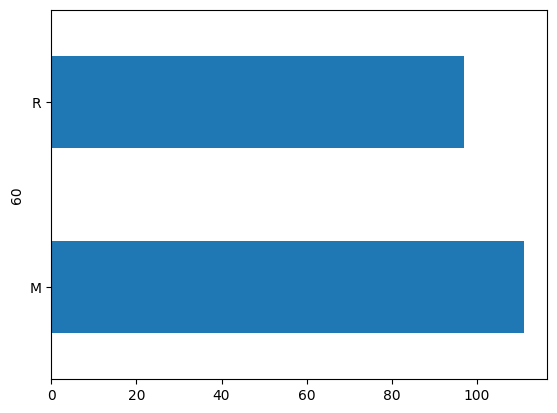

In [107]:
main_df[60].value_counts().plot(kind='barh')

In [108]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [109]:
inputs_df = main_df.drop(60, axis=1)

In [110]:
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

In [112]:
# Hàm Perceptron từ Ví dụ 1
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [113]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []

    max_iterations = 1000
    iteration = 0
    while iteration < max_iterations:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(-1, 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
            if has_converged(X, y, w[-1]):
                break
        if has_converged(X, y, w[-1]):
            break
        iteration += 1
    return (w, mis_points)


In [114]:
# a) Huấn luyện mô hình Perceptron
d = X_train.shape[1]
w_init = np.random.randn(d, 1)
start_time = time.time()
(w, mis_points) = perceptron(X_train.T, y_train, w_init)  # Chuyển vị X_train để phù hợp với định dạng
perceptron_time = time.time() - start_time
final_w = w[-1]
final_w

array([[-2.95761753e+01],
       [ 6.48174092e+01],
       [-5.62980734e+00],
       [-6.14134395e+01],
       [ 8.81361184e+01],
       [ 4.85637593e+01],
       [-2.45934746e+00],
       [-2.59420325e+01],
       [-2.49694367e+01],
       [ 3.69837146e+01],
       [-3.11759062e+01],
       [ 5.77749885e+01],
       [ 1.49398984e+01],
       [-9.50381850e+00],
       [-1.37688017e+00],
       [ 2.01971299e+00],
       [-1.82562720e+01],
       [-7.13432260e+00],
       [ 1.55431580e+01],
       [-2.86952938e+00],
       [ 1.88579246e+01],
       [-2.60242758e+01],
       [ 2.40317829e+01],
       [-1.94131415e+01],
       [ 3.12329118e+01],
       [-9.57835399e+00],
       [-5.48567960e+00],
       [ 8.42814193e-02],
       [ 6.29933153e+00],
       [-1.81313150e+01],
       [ 4.85803856e+01],
       [-6.77799796e+01],
       [ 2.55222948e+01],
       [ 2.50142993e+01],
       [-2.68927261e+01],
       [ 1.00575262e+01],
       [-2.18013494e+01],
       [-3.27706891e+00],
       [-5.7

In [115]:
# b) Dự đoán và tính các độ đo trên tập test
def predict_perceptron(X, w):
    return h(w, X)

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred_perceptron = predict_perceptron(X_test.T, final_w).flatten()
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
print("\nPerceptron Results:")
print(f"Training time: {perceptron_time:.4f} seconds")
print(f"Accuracy: {accuracy_perceptron:.4f}")
print(f"Precision: {precision_perceptron:.4f}")
print(f"Recall: {recall_perceptron:.4f}")


Perceptron Results:
Training time: 1.9016 seconds
Accuracy: 0.7937
Precision: 0.8929
Recall: 0.7143


In [117]:
from sklearn.linear_model import LogisticRegression
# c) So sánh với Logistic Regression và Naive Bayes
# Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
logistic_time = time.time() - start_time
y_pred_logistic = log_reg.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

print("\nLogistic Regression Results:")
print(f"Training time: {logistic_time:.4f} seconds")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")


Logistic Regression Results:
Training time: 0.0162 seconds
Accuracy: 0.8095
Precision: 0.8108
Recall: 0.8571


In [118]:
from sklearn.naive_bayes import GaussianNB
#Naive Bayes
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_time = time.time() - start_time
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("\nNaive Bayes Results:")
print(f"Training time: {nb_time:.4f} seconds")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")


Naive Bayes Results:
Training time: 0.0000 seconds
Accuracy: 0.7778
Precision: 0.9200
Recall: 0.6571


In [119]:
# So sánh tổng quan
print("\nSummary Comparison:")
print(f"{'Model':<20} {'Time (s)':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 68)
print(f"{'Perceptron':<20} {perceptron_time:<12.4f} {accuracy_perceptron:<12.4f} {precision_perceptron:<12.4f} {recall_perceptron:<12.4f}")
print(f"{'Logistic Regression':<20} {logistic_time:<12.4f} {accuracy_logistic:<12.4f} {precision_logistic:<12.4f} {recall_logistic:<12.4f}")
print(f"{'Naive Bayes':<20} {nb_time:<12.4f} {accuracy_nb:<12.4f} {precision_nb:<12.4f} {recall_nb:<12.4f}")


Summary Comparison:
Model                Time (s)     Accuracy     Precision    Recall      
--------------------------------------------------------------------
Perceptron           1.9016       0.7937       0.8929       0.7143      
Logistic Regression  0.0162       0.8095       0.8108       0.8571      
Naive Bayes          0.0000       0.7778       0.9200       0.6571      


### Ví dụ 3.

In [203]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import time

In [204]:
# Load dữ liệu ung thư vú
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
y = cancer_data.target


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [206]:
# Chuyển nhãn y từ {0, 1} sang {-1, 1} để phù hợp với Perceptron
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)

In [207]:
# Thêm cột x0 = 1 cho Perceptron
X_train_perceptron = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test_perceptron = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [208]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

In [209]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    max_iterations = 1000
    iteration = 0

    while iteration < max_iterations:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
            if has_converged(X, y, w[-1]):
                break
        if has_converged(X, y, w[-1]):
            break
        iteration += 1
    return (w, mis_points)

In [210]:
#Huấn luyện Perceptron
d = X_train_perceptron.shape[1]
w_init = np.random.randn(d, 1)
start_time = time.time()
(w, m) = perceptron(X_train_perceptron.T, y_train_perceptron,w_init)
perceptron_time = time.time() - start_time
final_w = w[-1]
final_w

array([[ 2.22686851e+03],
       [ 1.62922852e+04],
       [-6.90030676e+03],
       [ 5.32836477e+04],
       [ 2.22449063e+03],
       [-1.72807700e+02],
       [-1.33098891e+03],
       [-2.01674937e+03],
       [-8.35502333e+02],
       [-2.75349073e+02],
       [-2.41573539e+01],
       [ 4.42279485e+02],
       [ 6.62753867e+02],
       [-2.56451331e+03],
       [-1.55254396e+04],
       [-3.02239101e+01],
       [-3.71043370e+02],
       [-5.08953750e+02],
       [-1.21693136e+02],
       [-7.82854094e+01],
       [-3.50512704e+01],
       [ 1.76281548e+04],
       [-3.51054791e+04],
       [ 1.51024364e+04],
       [-7.77191071e+03],
       [-4.27667587e+02],
       [-4.64820698e+03],
       [-5.96868128e+03],
       [-1.68779665e+03],
       [-1.12111765e+03],
       [-3.77436346e+02]])

In [211]:
# Dự đoán Perceptron trên tập test
y_pred_perceptron = h(final_w, X_test_perceptron.T).flatten()
accuracy_perceptron = accuracy_score(y_test_perceptron, y_pred_perceptron)
precision_perceptron = precision_score(y_test_perceptron, y_pred_perceptron)
recall_perceptron = recall_score(y_test_perceptron, y_pred_perceptron)

In [212]:
y_pred_logistic
accuracy_perceptron
precision_perceptron
recall_logistic

0.9722222222222222

In [213]:
# Giảm chiều dữ liệu về 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

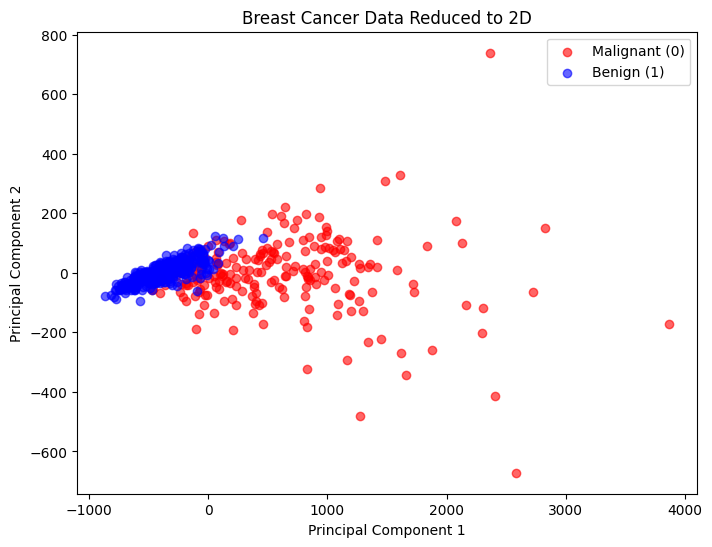

In [214]:
# Hiển thị dữ liệu đã giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], c='red', label='Malignant (0)', alpha=0.6)
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], c='blue', label='Benign (1)', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Data Reduced to 2D')
plt.legend()
plt.show()

In [215]:
#Huấn luyện và dự đoán bằng Logistic Regression
start_time = time.time()
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)
logistic_time = time.time() - start_time
y_pred_logistic = log_reg.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

# So sánh kết quả
print("\nPerceptron Results:")
print(f"Training time: {perceptron_time:.4f} seconds")
print(f"Accuracy: {accuracy_perceptron:.4f}")
print(f"Precision: {precision_perceptron:.4f}")
print(f"Recall: {recall_perceptron:.4f}")


Perceptron Results:
Training time: 3.2234 seconds
Accuracy: 0.9298
Precision: 0.9000
Recall: 1.0000


In [133]:
print("\nLogistic Regression Results:")
print(f"Training time: {logistic_time:.4f} seconds")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")

print("\nSummary Comparison:")
print(f"{'Model':<20} {'Time (s)':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 68)
print(f"{'Perceptron':<20} {perceptron_time:<12.4f} {accuracy_perceptron:<12.4f} {precision_perceptron:<12.4f} {recall_perceptron:<12.4f}")
print(f"{'Logistic Regression':<20} {logistic_time:<12.4f} {accuracy_logistic:<12.4f} {precision_logistic:<12.4f} {recall_logistic:<12.4f}")



Logistic Regression Results:
Training time: 0.0539 seconds
Accuracy: 0.9766
Precision: 0.9906
Recall: 0.9722

Summary Comparison:
Model                Time (s)     Accuracy     Precision    Recall      
--------------------------------------------------------------------
Perceptron           3.3585       0.8480       0.9881       0.7685      
Logistic Regression  0.0539       0.9766       0.9906       0.9722      


## Ví dụ 4 (Bài tập tự thực hành).

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('framingham.csv')

In [136]:
df = df.dropna()

In [137]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [140]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_val_2d = pca.transform(X_val)

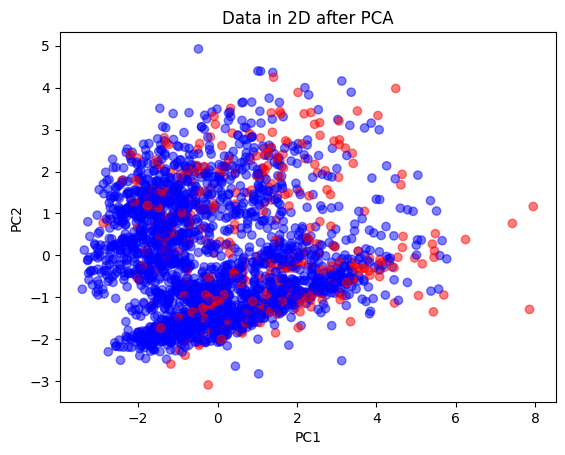

In [141]:
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='bwr', alpha=0.5)
plt.title("Data in 2D after PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [142]:
# Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_val)

In [143]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)

In [144]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)

In [145]:
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}\n")

print_metrics(y_val, y_pred_perceptron, "Perceptron")
print_metrics(y_val, y_pred_log_reg, "Logistic Regression")
print_metrics(y_val, y_pred_nb, "Naive Bayes")

Perceptron:
Accuracy: 0.7320
Precision: 0.2561
Recall: 0.3621

Logistic Regression:
Accuracy: 0.8469
Precision: 0.6071
Recall: 0.0977

Naive Bayes:
Accuracy: 0.8122
Precision: 0.3333
Recall: 0.1839



In [146]:
print("Perceptron Coefficients:", perceptron.coef_)
print("Logistic Regression Coefficients:", log_reg.coef_)

Perceptron Coefficients: [[  6.46349173   4.41639287  -1.25510783   5.69501786   4.97683886
   -3.35091262 -12.16846659   0.78077875  -3.82530728   6.58248876
    6.66166593  -1.39738287   1.85188888   0.85367255  -1.38095202]]
Logistic Regression Coefficients: [[ 0.28380455  0.56361465 -0.01482549  0.07058526  0.23370371  0.04785507
   0.11466084  0.08532308  0.03602648  0.13863001  0.37036436 -0.01264452
   0.01091275 -0.10565922  0.1572414 ]]


In [147]:
# Perceptron on 2D
perceptron_2d = Perceptron(random_state=42)
perceptron_2d.fit(X_train_2d, y_train)
y_pred_perceptron_2d = perceptron_2d.predict(X_val_2d)

# Logistic Regression on 2D
log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X_train_2d, y_train)
y_pred_log_reg_2d = log_reg_2d.predict(X_val_2d)

# Naive Bayes on 2D
nb_2d = GaussianNB()
nb_2d.fit(X_train_2d, y_train)
y_pred_nb_2d = nb_2d.predict(X_val_2d)

# Calculate metrics for 2D
print_metrics(y_val, y_pred_perceptron_2d, "Perceptron (2D)")
print_metrics(y_val, y_pred_log_reg_2d, "Logistic Regression (2D)")
print_metrics(y_val, y_pred_nb_2d, "Naive Bayes (2D)")

# Print coefficients for 2D models
print("Perceptron 2D Coefficients:", perceptron_2d.coef_)
print("Logistic Regression 2D Coefficients:", log_reg_2d.coef_)

Perceptron (2D):
Accuracy: 0.8131
Precision: 0.2540
Recall: 0.0920

Logistic Regression (2D):
Accuracy: 0.8423
Precision: 0.5455
Recall: 0.0345

Naive Bayes (2D):
Accuracy: 0.8377
Precision: 0.4444
Recall: 0.0920

Perceptron 2D Coefficients: [[0.3000095 2.905862 ]]
Logistic Regression 2D Coefficients: [[0.3303274 0.2506484]]


## Ví dụ 5 (Bài tập tự thực hành).

In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [179]:
data = pd.read_csv('Analysis-Portfolio-Task-Data.csv')

In [180]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [181]:
data['Store Type'] = data['Store Type'].map({'Convenient Stores': 0, 'Superstore': 1, 'Online': 2})


In [182]:
data = data.drop('CustomerID', axis=1)

In [183]:
data

,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,48.81,1,26,0,8,2,1
1,33.44,0,33,1,6,5,1
2,131.57,1,56,2,35,8,12
3,20.02,1,27,0,0,1,1
4,95.54,0,55,2,38,18,20
...,...,...,...,...,...,...,...
70,75.23,0,53,1,9,14,5
71,97.21,0,43,1,18,9,10
72,77.65,0,46,1,10,10,9
73,128.67,0,48,1,41,15,19


In [184]:
train_data = data.iloc[:60]
test_data = data.iloc[60:]

In [185]:
X_train = train_data.drop('Shopping Basket', axis=1)
y_train = train_data['Shopping Basket']
X_test = test_data.drop('Shopping Basket', axis=1)
y_test = test_data['Shopping Basket']

In [186]:

print(X_train.shape)  # Kiểm tra kích thước của X_train
print(y_train.shape)  # Kiểm tra kích thước của y_train



(60, 6)
(60,)


In [187]:
print(X_train.isna().sum())  # Kiểm tra số lượng giá trị NaN trong X_train
print(y_train.isna().sum())  # Kiểm tra số lượng giá trị NaN trong y_train


Gender                 0
Age                    0
Store Type             0
Value Products         0
Brand Products         0
Top Fresco Products    0
dtype: int64
0


In [195]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


accuracy_perceptron = accuracy_score(y_test_class, y_pred_perceptron)
print("\n2a) Perceptron:")
print(f"Độ chính xác: {accuracy_perceptron:.2f}")
print("Hệ số của mô hình:", perceptron_model.coef_)
print("Hệ số chặn (intercept):", perceptron_model.intercept_)


2a) Perceptron:
Độ chính xác: 0.80
Hệ số của mô hình: [[-17. -46.  37.  81. 132.  51.]]
Hệ số chặn (intercept): [-47.]


In [190]:
# Giải thích hệ số
print("\nÝ nghĩa của các hệ số:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {lr_model.coef_[i]:.2f} - Mỗi đơn vị tăng trong {col} làm tăng Shopping Basket khoảng {lr_model.coef_[i]:.2f} đơn vị.")


Ý nghĩa của các hệ số:
Gender: -2.61 - Mỗi đơn vị tăng trong Gender làm tăng Shopping Basket khoảng -2.61 đơn vị.
Age: 0.08 - Mỗi đơn vị tăng trong Age làm tăng Shopping Basket khoảng 0.08 đơn vị.
Store Type: 8.71 - Mỗi đơn vị tăng trong Store Type làm tăng Shopping Basket khoảng 8.71 đơn vị.
Value Products: 0.99 - Mỗi đơn vị tăng trong Value Products làm tăng Shopping Basket khoảng 0.99 đơn vị.
Brand Products: 1.03 - Mỗi đơn vị tăng trong Brand Products làm tăng Shopping Basket khoảng 1.03 đơn vị.
Top Fresco Products: 2.44 - Mỗi đơn vị tăng trong Top Fresco Products làm tăng Shopping Basket khoảng 2.44 đơn vị.


In [191]:
# 2) Phân loại: Shopping Basket > 50 là lớp 1, còn lại là lớp -1
y_train_class = np.where(y_train > 50, 1, -1)
y_test_class = np.where(y_test > 50, 1, -1)

In [194]:
# 2a) Perceptron
perceptron_model = Perceptron(random_state=2)
perceptron_model.fit(X_train, y_train_class)
y_pred_perceptron = perceptron_model.predict(X_test)

accuracy_perceptron = accuracy_score(y_test_class, y_pred_perceptron)
print("\n2a) Perceptron:")
print(f"Độ chính xác: {accuracy_perceptron:.2f}")
print("Hệ số của mô hình:", perceptron_model.coef_)
print("Hệ số chặn (intercept):", perceptron_model.intercept_)


2a) Perceptron:
Độ chính xác: 0.80
Hệ số của mô hình: [[-17. -46.  37.  81. 132.  51.]]
Hệ số chặn (intercept): [-47.]


In [196]:
# Giải thích hệ số
print("\nÝ nghĩa của các hệ số Perceptron:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {perceptron_model.coef_[0][i]:.2f} - Ảnh hưởng tương đối của {col} đến quyết định phân lớp.")


Ý nghĩa của các hệ số Perceptron:
Gender: -17.00 - Ảnh hưởng tương đối của Gender đến quyết định phân lớp.
Age: -46.00 - Ảnh hưởng tương đối của Age đến quyết định phân lớp.
Store Type: 37.00 - Ảnh hưởng tương đối của Store Type đến quyết định phân lớp.
Value Products: 81.00 - Ảnh hưởng tương đối của Value Products đến quyết định phân lớp.
Brand Products: 132.00 - Ảnh hưởng tương đối của Brand Products đến quyết định phân lớp.
Top Fresco Products: 51.00 - Ảnh hưởng tương đối của Top Fresco Products đến quyết định phân lớp.


In [197]:
# 2b) Hồi quy Logistic
logistic_model = LogisticRegression(random_state=2)
logistic_model.fit(X_train, y_train_class)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
print("\n2b) Hồi quy Logistic:")
print(f"Độ chính xác: {accuracy_logistic:.2f}")
print("Hệ số của mô hình:", logistic_model.coef_)
print("Hệ số chặn (intercept):", logistic_model.intercept_)


2b) Hồi quy Logistic:
Độ chính xác: 1.00
Hệ số của mô hình: [[ 0.27493706  0.09229302  0.95184175  0.33188493  0.54348448 -0.07898914]]
Hệ số chặn (intercept): [-11.23670585]


In [198]:
# Giải thích hệ số
print("\nÝ nghĩa của các hệ số Hồi quy Logistic:")
for i, col in enumerate(X_train.columns):
    print(f"{col}: {logistic_model.coef_[0][i]:.2f} - Ảnh hưởng của {col} đến log-odds của lớp 1.")


Ý nghĩa của các hệ số Hồi quy Logistic:
Gender: 0.27 - Ảnh hưởng của Gender đến log-odds của lớp 1.
Age: 0.09 - Ảnh hưởng của Age đến log-odds của lớp 1.
Store Type: 0.95 - Ảnh hưởng của Store Type đến log-odds của lớp 1.
Value Products: 0.33 - Ảnh hưởng của Value Products đến log-odds của lớp 1.
Brand Products: 0.54 - Ảnh hưởng của Brand Products đến log-odds của lớp 1.
Top Fresco Products: -0.08 - Ảnh hưởng của Top Fresco Products đến log-odds của lớp 1.


In [ ]:
# 2c) Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_class)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test_class, y_pred_nb)
print("\n2c) Naïve Bayes:")
print(f"Độ chính xác: {accuracy_nb:.2f}")

print("\nNaïve Bayes không có hệ số tuyến tính, nó dựa trên xác suất có điều kiện của các đặc trưng.")


2c) Naïve Bayes:
Độ chính xác: 1.00

Naïve Bayes không có hệ số tuyến tính, nó dựa trên xác suất có điều kiện của các đặc trưng.



So sánh các mô hình phân loại:
Perceptron Accuracy: 0.80
Logistic Regression Accuracy: 1.00
Naïve Bayes Accuracy: 1.00


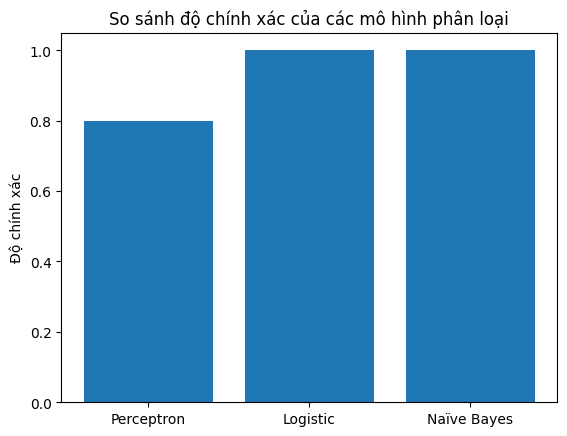

In [201]:
# So sánh các mô hình
print("\nSo sánh các mô hình phân loại:")
print(f"Perceptron Accuracy: {accuracy_perceptron:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")

# Vẽ biểu đồ so sánh
plt.bar(['Perceptron', 'Logistic', 'Naïve Bayes'], 
        [accuracy_perceptron, accuracy_logistic, accuracy_nb])
plt.title('So sánh độ chính xác của các mô hình phân loại')
plt.ylabel('Độ chính xác')
plt.show()